**Задача 1**

Пусть дана выборка точек $y_{i}$. Решите задачу МНК, моделируя данные постоянной величиной $\check{y}$, что отвечает минимизации функции потерь

$\mathcal{L}  = \sum_{i=1}^{l} (y_i - \check{y})^2 → \min\limits_{\check{y}} $ 


In [ ]:
import numpy as np
from scipy.optimize import minimize

l = 5
y_i = np.random.normal(0,1,(1,l))
print(y_i, '\n')

def fun(y):
    return np.sum((y_i - y)**2) 

# scipy.optimize.minimize(fun, x0, method=None, args=(),  jac=None, hessp=None, hess=None, constraints=(), tol=None, bounds=None, callback=None, options=None)
# If you have noisy measurements: Use Nelder-Mead or Powell. (source: https://stackoverflow.com/questions/58925576/how-to-choose-proper-method-for-scipy-optimize-minimize)
print((minimize(fun, 1, method='Powell')).x)



[[ 0.53672337  0.88010934 -0.56810254  2.03580078 -0.3448156 ]] 

[0.50794308]


**Задача 2**

Для четырех выборок из *квартета Энскомба* вычислите выборочные дисперсии x и y  координат, а также коэффициент
линейной корреляции Пирсона. Изобразите выборки на графиках. Данные можно получить в системе jupyter с
помощью библиотеки **seaborn**, вызвав метод **load_dataset(’anscombe’)**.

            x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50  


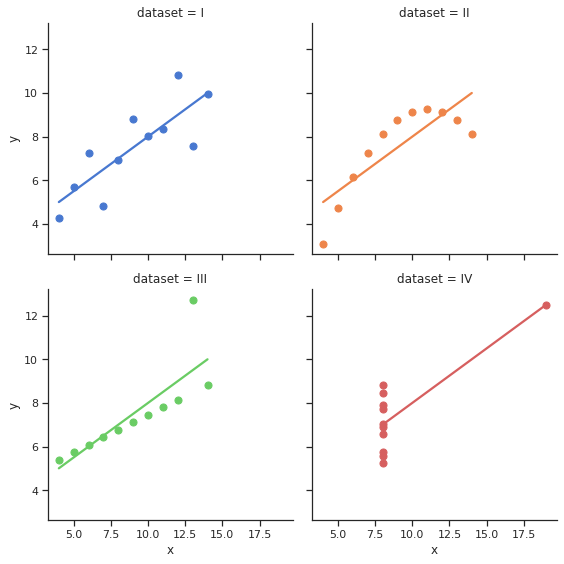

In [ ]:
# Sources: https://datastream.pro/kvartet-enskomba/ & https://seaborn.pydata.org/examples/anscombes_quartet.html

import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
anscombe = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(
    data=anscombe, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

# print(anscombe)
print(anscombe.groupby("dataset").describe())


**Задача 3**

На лекции обсуждалось, что метод наименьших квадратов — это способ поставить задачу о решении *переопределенной*
системы Xw = y, которая имеет явный ответ, выражающийся через левую псевдообратную матрицу для X. Для
*недоопределенной* системы Xw = y (имеющей бесконечно много решений) можно поставить задачу о поиске решения
с минимальной $l_2$ - нормой весов ${\|w\|}^2 = w^{T}w$. Решите такую задачу и покажите, что ответ выражается через
правую псевдообратную матрицу для X. Считайте, что прямоугольная матрица X имеет полный ранг (максимально
возможный).

\begin{cases}
   Xw = y\\
   {\|w\|}_{l_2} = w^{T}w → min
 \end{cases}

 $$\frac{\partial {\|w\|}_{l_2}}{\partial w_j} = \frac{\partial}{\partial w_j}  (w_iw_i) =  2\delta_{ij}w_i = 2w_j=0$$

 Метод Лагранжа:
$$L = w_iw_j-\lambda_j (w_{jm}w_m-y_j) ⇒ \frac{\partial L}{\partial w_k}\ = 2w_k - \lambda_jx_{jk} = 0 ⇒ w_k = \frac{1}{2}\lambda_jx_{jk}$$
$$ x_{ik}w_k = y_i ⇒ \frac{1}{2}x_{ik}\lambda_jx_{jk} = y_i ⇒ \frac{1}{2}xx^{T}\overline λ = \overline y \Rightarrow \\
\Rightarrow \overline w = \frac{1}{2}x^{T} \overline λ = x^{T}(xx^{T})^{-1} \overline y$$

**Задача 4**

Обработайте какую-нибудь лабораторную работу (например, из курса общей физики), требующую проведения
прямой по экспериментально полученным точкам. Для решения задачи регрессии рекомендуется использовать
библиотеку **scikit-learn (sklearn)** или **scipy**.

[ 0.4306857  -2.72619512]
[0.07037848 0.57090474]


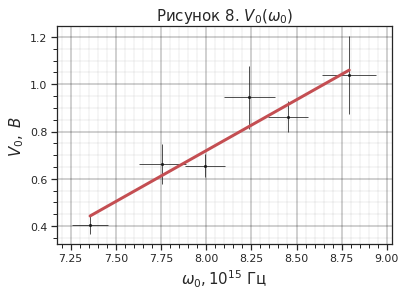

In [ ]:
# 1st method

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.linear_model import LinearRegression

x_arr = np.array([8.79177, 8.45272, 8.23844, 7.99387, 7.75702, 7.35736])
y_arr = np.array([1.037647059, 0.8622593373, 0.9452541153, 0.6559873044, 0.663328479, 0.4058794674])

x_err = np.array([0.15, 0.11, 0.14, 0.11, 0.13, 0.1])
y_err = np.array([0.1653850137, 0.0661507713, 0.1332307709, 0.04714868395, 0.08364090175, 0.03962215766])


def func(x, a, b):
    return a * x + b

popt, pcov = opt.curve_fit(func, x_arr, y_arr) #The popt argument are the best-fit paramters for a and b
print(popt)
print(np.sqrt(np.diag(pcov)))

plt.plot(x_arr, y_arr, 'o', color='k', markersize=2)
plt.plot(x_arr, func(x_arr, popt[0], popt[1]), 'r', linestyle='-', linewidth=3)

plt.errorbar(x_arr, y_arr, xerr=x_err, yerr=y_err, color='k', linestyle='None', linewidth=0.75)

plt.grid(which='major', color='k', linewidth=0.4)
plt.grid(which='minor', color='k', linestyle=':', linewidth=0.2)
plt.minorticks_on()

plt.title('Рисунок 8. ' + r'$V_0 (\omega_0)$', fontsize=15)
plt.xlabel(r'$ \omega_0,  10^{15}$' + ' Гц', fontsize=15)
plt.ylabel(r'$V_0, \ B$', fontsize=15)

plt.show()


intercept: -2.7261951319774007
slope: [0.4306857]


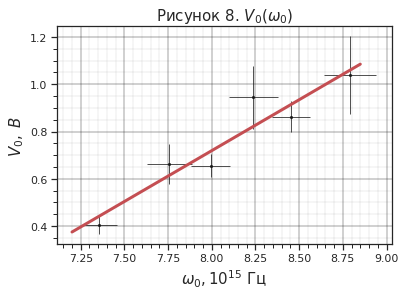

In [ ]:
# 2nd method

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.linear_model import LinearRegression

x_arr = np.array([8.79177, 8.45272, 8.23844, 7.99387, 7.75702, 7.35736])
y_arr = np.array([1.037647059, 0.8622593373, 0.9452541153, 0.6559873044, 0.663328479, 0.4058794674])

x_err = np.array([0.15, 0.11, 0.14, 0.11, 0.13, 0.1])
y_err = np.array([0.1653850137, 0.0661507713, 0.1332307709, 0.04714868395, 0.08364090175, 0.03962215766])

model = LinearRegression().fit(x_arr.reshape(-1, 1), y_arr)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
x_new = np.arange(7.2, 8.9, 0.05)
y_new = model.predict(x_new.reshape(-1, 1))



plt.plot(x_arr, y_arr, 'o', color='k', markersize=2)
plt.plot(x_new, y_new,  'r', linestyle='-', linewidth=3)

plt.errorbar(x_arr, y_arr, xerr=x_err, yerr=y_err, color='k', linestyle='None', elinewidth=0.75)

plt.grid(which='major', color='k', linewidth=0.4)
plt.grid(which='minor', color='k', linestyle=':', linewidth=0.2)
plt.minorticks_on()

plt.title('Рисунок 8. ' + r'$V_0 (\omega_0)$', fontsize=15)
plt.xlabel(r'$ \omega_0,  10^{15}$' + ' Гц', fontsize=15)
plt.ylabel(r'$V_0, \ B$', fontsize=15)

plt.show()

**Задача 5**